In [1]:
import pandas as pd

import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(mpl.__version__)
# seaborn 스타일 사용
plt.style.use('seaborn-notebook')

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


3.4.3


# 연습문제 1

In [3]:
data = pd.read_csv('data/연령별_실업율.csv', index_col='연도', encoding='cp949')

In [4]:
data

,20대,30대,40대,50대,60세이상
연도,,,,,
2001년,7.4,3.2,3.0,2.8,1.2
2002년,6.6,2.9,2.0,2.0,1.1
2003년,7.7,2.8,2.2,2.2,1.0
2004년,7.9,3.2,2.3,2.8,1.2
2005년,7.7,3.4,2.4,2.4,1.3
2006년,7.7,3.0,2.8,2.4,1.6
2007년,7.1,3.2,2.1,2.2,1.3
2008년,7.0,3.1,2.2,2.1,1.2
2009년,7.9,3.6,2.5,2.5,1.6


In [8]:
year = ['2001년','2002년','2003년','2004년','2005년']
age = ['20대','30대','40대','50대','60세이상']
chartdata = data.loc[year,age]
chartdata = chartdata.T

Text(0, 0.5, '연도명')

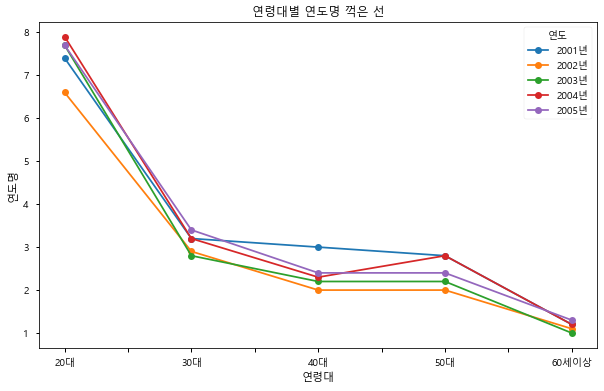

In [11]:
chartdata.plot(title='연령대별 연도명 꺽은 선', figsize=(10,6), legend=True, marker='o')
plt.xlabel('연령대')
plt.ylabel('연도명')

# 연습문제 2

In [12]:
data = pd.read_csv('data/kbo.csv',encoding='cp949')

In [13]:
data

,Unnamed: 0,순위,선수명,팀명,AVG,HR,R,RBI
0,1,1,최형우,삼성,0.376,31,99,144
1,2,2,김태균,한화,0.365,23,94,136
2,3,3,이용규,한화,0.352,3,98,41
3,4,4,김주찬,기아,0.346,23,97,101
4,5,5,박용택,엘지,0.346,11,84,90
5,6,6,구자욱,삼성,0.343,14,105,77
6,7,7,박민우,엔씨,0.343,3,84,55
7,8,8,유한준,케이티,0.336,14,70,64
8,9,9,황재균,롯데,0.335,27,97,113
9,10,10,박건우,두산,0.335,20,95,83


In [17]:
xdata = data.loc[:,'AVG']
ydata = data.loc[:,'HR']

Text(0.5, 1.0, '산점도 그래프')

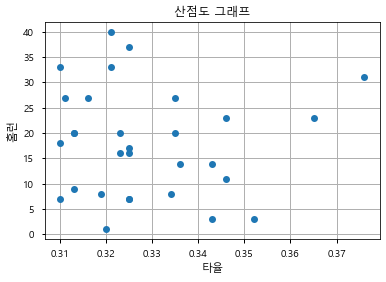

In [32]:
plt.figure()
plt.plot(xdata, ydata, marker='o', linestyle='')
plt.grid(True)
plt.xlabel('타율')
plt.ylabel('홈런')
plt.title('산점도 그래프')

# 연습문제 3

In [35]:
data = pd.read_csv('data/final_exam.csv', index_col='names', encoding='cp949')

In [36]:
data

,gender,korean,english,math,computer,science
names,,,,,,
강감찬,M,85,77,80,100,96
이순신,M,86,90,82,93,93
신사임당,F,80,98,87,92,90
서현진,F,97,87,80,85,80
전지현,F,100,100,98,100,94


In [37]:
chartdata = data['korean']

In [44]:
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure()
    plt.bar(x, y, color=color, alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.grid(True)

    YTICKS_INTERVAL = 10

    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)
    print('-' * 40)

    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '점'
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')

    # 평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)
    print('-' * 40)

    average = '평균 : %d점' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=0, y=meanval + 1, s=average, horizontalalignment='center')

In [45]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
mycolor = colors[0:len(chartdata)]

110
names
강감찬     18.973214
이순신     19.196429
신사임당    17.857143
서현진     21.651786
전지현     22.321429
Name: korean, dtype: float64
----------------------------------------
89.6
----------------------------------------


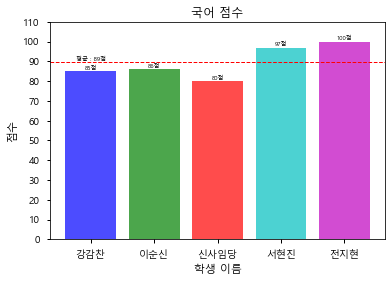

In [46]:
MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='학생 이름', ylabel='점수', title='국어 점수')